<a href="https://colab.research.google.com/github/pranavpatnaik1/dl-proj-using-tf2/blob/main/ch1/perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Data w/ Perceptrons**


Importing modules: Numpy, Pandas, Tensorflow, Scikit-learn, MATPLOTLIB

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import feature_column #reformats structured for ease in calculations

from tensorflow.keras import layers # to create layers in NN
from sklearn.model_selection import train_test_split # splits data for us

# these two are great for evaluating the overall accuracy & effectiveness of a model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving perceptron-data.csv to perceptron-data.csv


**Start of code:**

In [2]:
number_of_features=2
number_of_units=1

weight=tf.Variable(tf.zeros([number_of_features, number_of_units])) # init to zero
bias=tf.Variable(tf.zeros([number_of_units]))

def perceptron(x):
  I=tf.add(tf.matmul(x, weight), bias)
  output=tf.sigmoid(I)
  return output

Next, we'll define the loss function & optimizer. In this project, we'll use the Adam optimizer.

In [3]:
individual_loss=lambda : abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
optimizer=tf.keras.optimizers.Adam(.01) # Adam optimizer

Reading in the data with pandas:

In [4]:
dataframe=pd.read_csv('perceptron-data.csv')
dataframe.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


Let's do a quick visualization of the data using MATPLOTLIB's Pyplot:

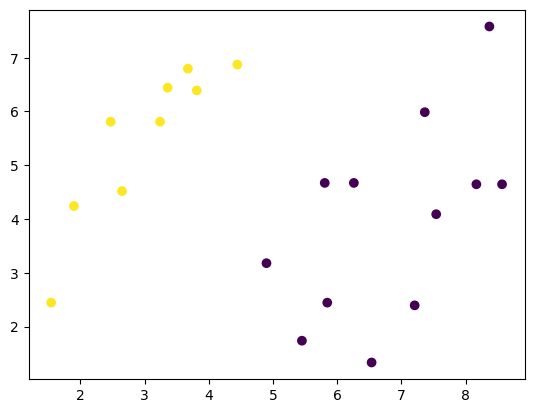

In [5]:
plt.scatter(dataframe.x1, dataframe.x2,c=dataframe.label)

In [6]:
x_input=dataframe[['x1', 'x2']].values # creating new arrays out of input
y_label=dataframe[['label']].values # creating new labels out of input

# init x, y then convert to suitable float32 format

x=tf.Variable(x_input)
x=tf.cast(x,tf.float32)

y=tf.Variable(y_label)
y=tf.cast(y,tf.float32)

Next, using the Adam optimizer defined above, we'll optimize our weights and bias.

In [9]:
for i in range(1000):
    with tf.GradientTape() as tape:
        loss = individual_loss()  # computing loss
    gradients = tape.gradient(loss, [weight, bias])  # computing gradients
    optimizer.apply_gradients(zip(gradients, [weight, bias]))  # updating weights and bias

# view new weights and bias
tf.print(weight,bias)

[[-2.42329049]
 [1.85045207]] [1.7498821]


Next, we'll view the final loss:

In [10]:
final_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=perceptron(x)))
tf.print(final_loss)

0.534005582


Here, we're rounding off the output values to make it either 1 or 0 (threshold = 0.5).

In [12]:
ypred=perceptron(x)
ypred=tf.round(ypred)

Finally, we calculate the accuracy score using accuracy_score(y, ypred). This lets us know how accurate the model is by comparing the predicted output to the ground truth.

In [13]:
accuracy_score(y, ypred)

1.0

You may find the confusion matrix detailed below:

In [14]:
confusion_matrix(y, ypred)

array([[12,  0],
       [ 0,  9]])

There we have it! We've successfully defined a perceptron with 100% accuracy (albeit, the source code is rather small).

Let me know if you have any questions: @pranavpatnaik_ on Instagram.